In [ ]:
Matplotlib fudnamentals


In [1]:
import pandas as pd

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,4377.0,2011.421065,2.906408,2007.0,2009.0,2011.0,2014.0,2017.0
Month,4377.0,6.459904,3.446815,1.0,3.0,6.0,9.0,12.0
Quantity,4377.0,307.802148,411.315021,1.0,14.0,153.0,461.0,3017.0
Pct,4377.0,2.762257,3.635185,0.0,0.1,1.4,4.2,22.7


In [26]:
df.head(20)

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5
5,2007,1,Skoda,665,5.2
6,2007,1,Opel,622,4.9
7,2007,1,Audi,599,4.7
8,2007,1,Honda,423,3.3
9,2007,1,Mercedes-Benz,362,2.9


In [19]:
pip install duckdb

   ---------------------------------------- 0.0/11.4 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.4 MB 10.7 MB/s eta 0:00:01
   ------------ --------------------------- 3.7/11.4 MB 9.9 MB/s eta 0:00:01
   ----------------------- ---------------- 6.8/11.4 MB 11.1 MB/s eta 0:00:01
   ----------------------------------- ---- 10.0/11.4 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 11.4/11.4 MB 11.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import duckdb

# brand add total quantity for each brand

df_quantity_brand = duckdb.query("""
    SELECT 
        make AS Brand,
        SUM(quantity) AS Quantity
    FROM df 
    GROUP BY 
        make
    ORDER BY 
        quantity
    DESC        
""").df()
df_quantity_brand.head()

,Brand,Quantity
0,Volkswagen,206669.0
1,Toyota,168177.0
2,Volvo,99937.0
3,Ford,99713.0
4,BMW,73315.0


Barchart

<Axes: xlabel='Brand'>

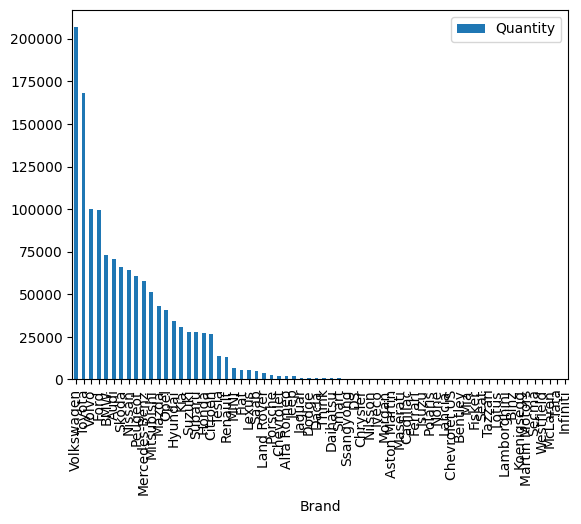

In [29]:
df_quantity_brand.plot(kind= "bar", x = "Brand", y = "Quantity")

Plot top 5 most popular brands

<Axes: xlabel='Brand'>

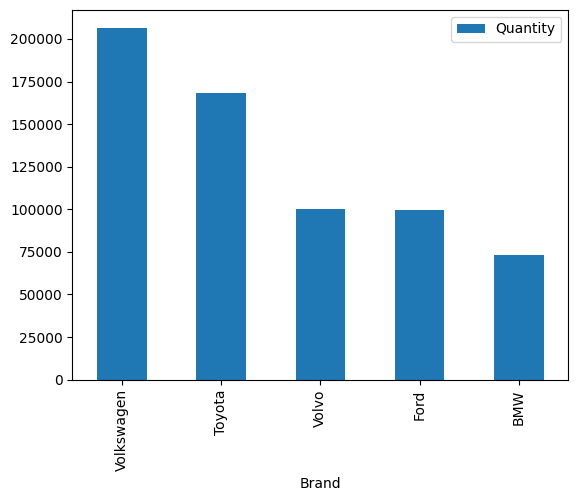

In [31]:
df_quantity_brand.head(5).plot(kind= "bar", x = "Brand", y = "Quantity")

<Axes: xlabel='Brand'>

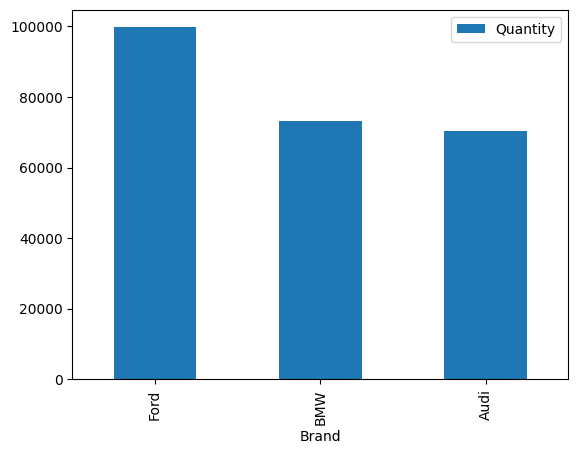

In [33]:
df_quantity_brand.iloc [3:6].plot(kind= "bar", x = "Brand", y = "Quantity")

## Matplotlib bar

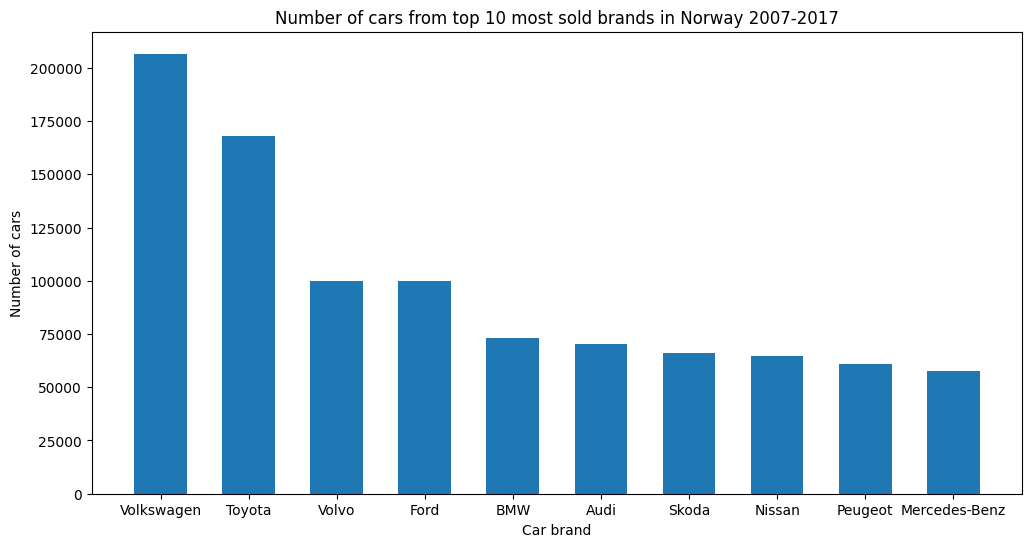

In [46]:
import matplotlib.pyplot as plt

df_quantity_brand_top10 = df_quantity_brand.iloc [:10]

fig, ax = plt.subplots(figsize = (12,6)) ## Inches, widh,height

ax.bar(
    x = df_quantity_brand_top10["Brand"],
    height = df_quantity_brand_top10["Quantity"],
    width=0.6,
)
    
ax.set(
        title="Number of cars from top 10 most sold brands in Norway 2007-2017",
        xlabel="Car brand",
        ylabel="Number of cars",       
)

fig.savefig("figures/bars_top_10_cars.png")



    

#Linechart

In [52]:
df_quantity_year = duckdb.query(
    """
    SELECT year, SUM(quantity) AS Quantity
    FROM df
    Group BY year
    ORDER BY
        year 
             """
).df().set_index("Year")

C:\Users\eriku\AppData\Local\Temp\ipykernel_5728\2291906388.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


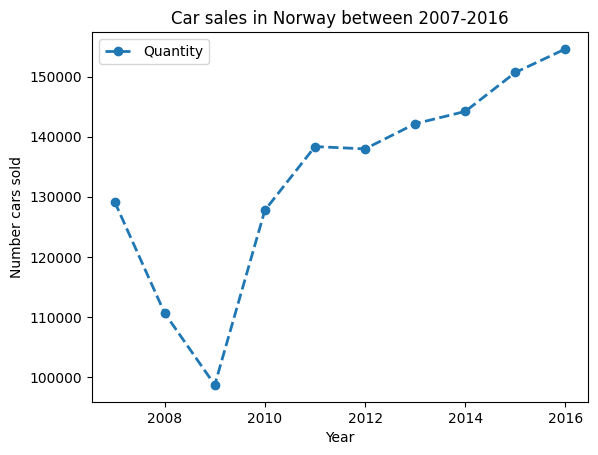

In [57]:
df_quantity_year.iloc[:-1].plot(
    title = "Car sales in Norway between 2007-2016",
    xlabel="Year", 
    ylabel="Number cars sold",
    style="--o",
    linewidth=2,
)

ax.legend().remove()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/car_sales_yearly_line_png")
                                